### Import Packages 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Read data and show intial columns

In [3]:
df = pd.read_csv('MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Glance of Dataframe

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Editing and renaming columns

In [5]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])
df = df.rename(columns={'model year': 'model_year'})
df = df.rename(columns={'car name': 'car_name'})
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Datatypes of Columns

In [6]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


### Null values Confirmation

In [7]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


### describe() method on dataframe

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### HISTOGRAM 1

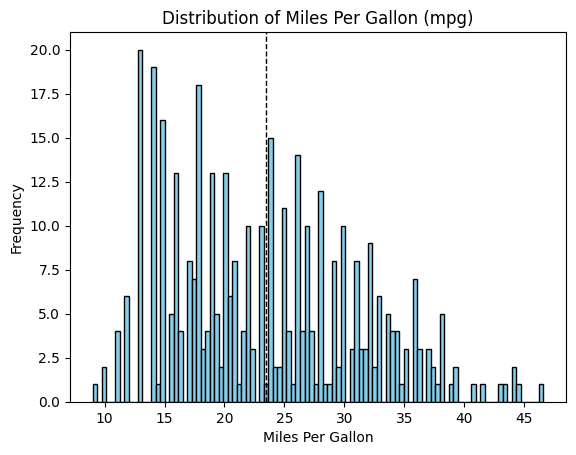

In [9]:
plt.hist(df['mpg'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Miles Per Gallon (mpg)')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.axvline(df.mpg.mean(), color= 'k', linestyle = 'dashed', linewidth=1)
plt.show()

### HISTOGRAM 2

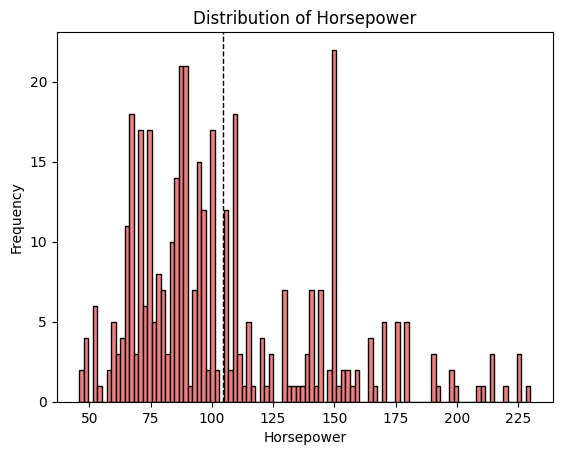

In [10]:
plt.hist(df['horsepower'], bins=100, color='lightcoral', edgecolor='black')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.axvline(df.horsepower.mean(), color= 'k', linestyle = 'dashed', linewidth=1)
plt.show()

### BOX PLOT

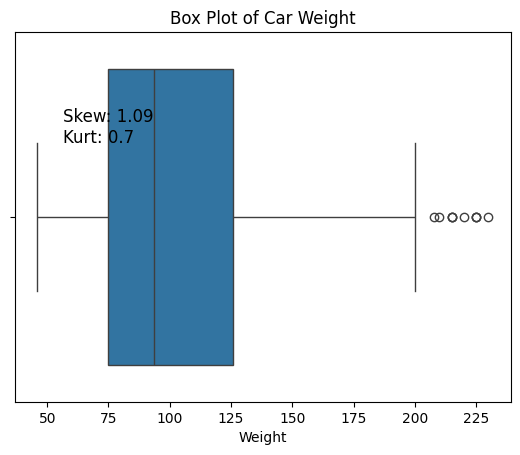

In [11]:
s = str(round(df.horsepower.skew(), 2))
k = str(round(df.horsepower.kurt(), 2))
text = 'Skew: ' + s + '\n' + 'Kurt: ' + k

plt.text(.2, .65, text, fontsize=12, transform=plt.gcf().transFigure)

sns.boxplot(x=df['horsepower'])
plt.title('Box Plot of Car Weight')
plt.xlabel('Weight')
plt.show()


### BOX PLOT 2

C:\Users\ravik\AppData\Local\Temp\ipykernel_23428\1416408653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='origin', y='mpg', kind='box', data=df, palette='Set2', height=4, aspect=1.5)


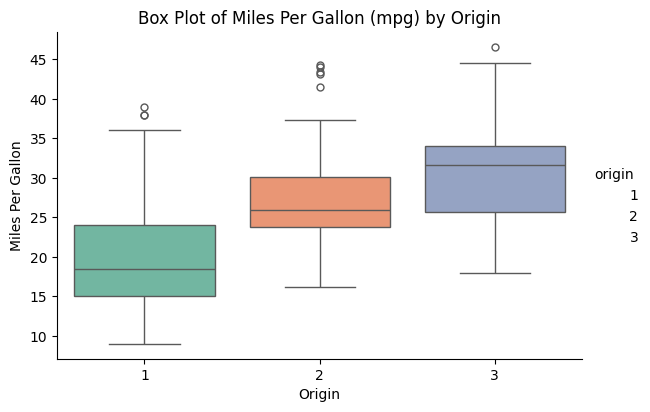

In [12]:
sns.catplot(x='origin', y='mpg', kind='box', data=df, palette='Set2', height=4, aspect=1.5)
plt.title('Box Plot of Miles Per Gallon (mpg) by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon')
plt.show()


### SCATTER PLOT

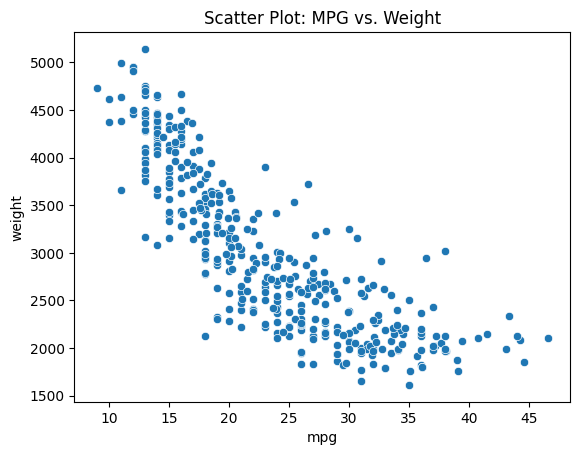

In [13]:
sns.scatterplot(x='mpg', y='weight', data=df)
plt.title('Scatter Plot: MPG vs. Weight')
plt.show()

### BARPLOT 1

<Axes: xlabel='model_year', ylabel='mpg'>

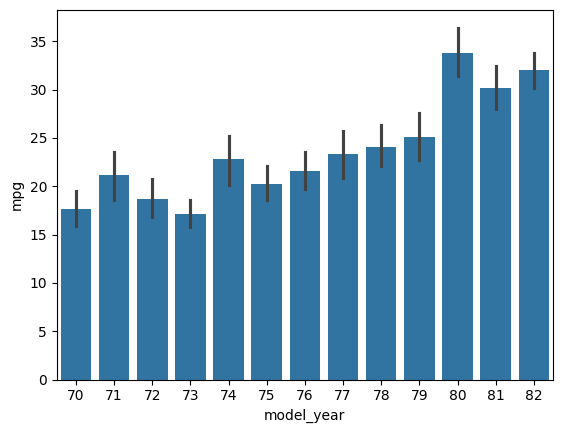

In [14]:
sns.barplot(data=df, x = 'model_year', y = 'mpg')

### SCATTER PLOT 2

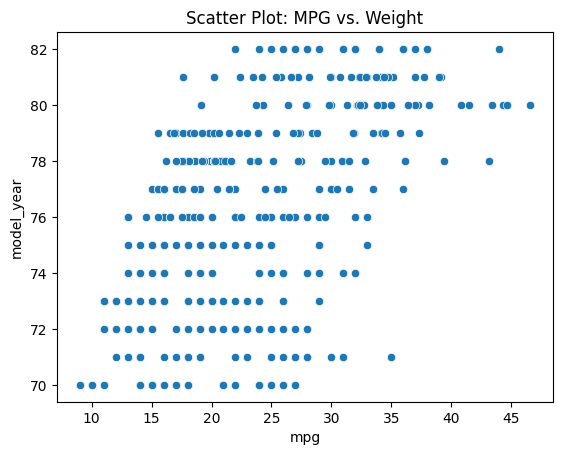

In [15]:
sns.scatterplot(x='mpg', y='model_year', data=df)
plt.title('Scatter Plot: MPG vs. Weight')
plt.show()

### SCATTER PLOT 3

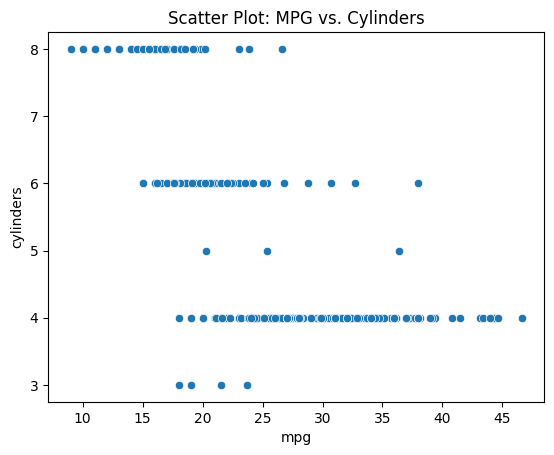

In [16]:
sns.scatterplot(x='mpg', y='cylinders', data=df)
plt.title('Scatter Plot: MPG vs. Cylinders')
plt.show()

### BAR  PLOT 2

<Axes: xlabel='cylinders', ylabel='mpg'>

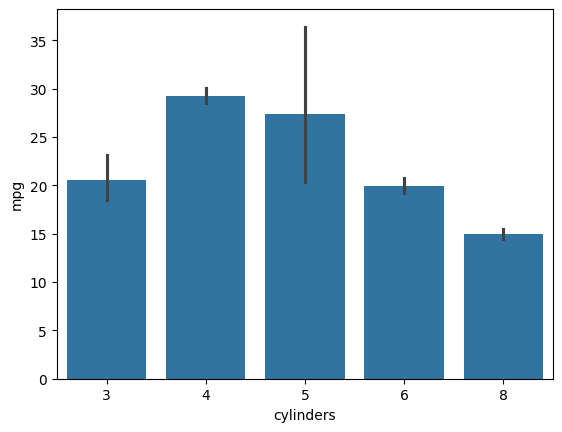

In [17]:
sns.barplot(data=df, x = 'cylinders', y = 'mpg')

### SCATTER PLOT 4

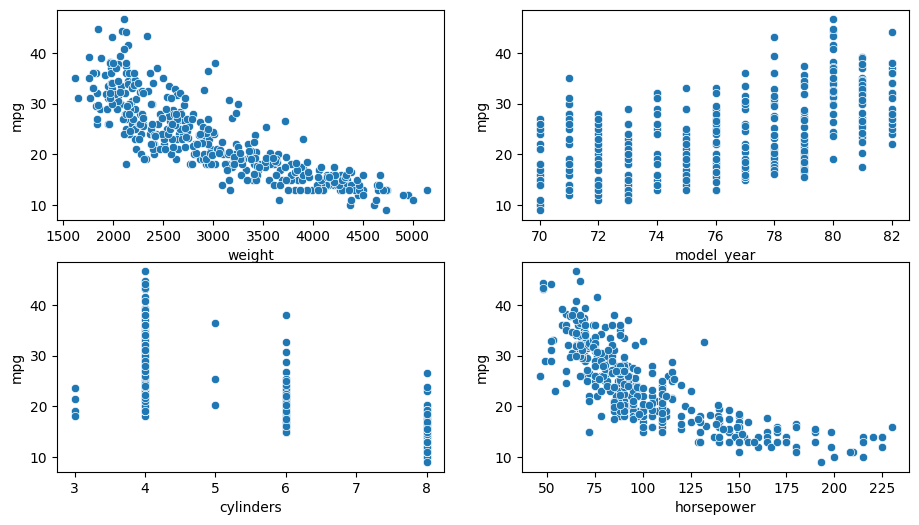

In [18]:
fig, axs = plt.subplots(2,2, figsize = (11,6))
plt1 = sns.scatterplot(data =df, x= 'weight', y = 'mpg', ax = axs[0,0])
plt1 = sns.scatterplot(data =df, x= 'model_year', y = 'mpg', ax = axs[0,1])
plt1 = sns.scatterplot(data =df, x= 'cylinders', y = 'mpg', ax = axs[1,0])
plt1 = sns.scatterplot(data =df, x= 'horsepower', y = 'mpg', ax = axs[1,1])

### JOINT PLOT

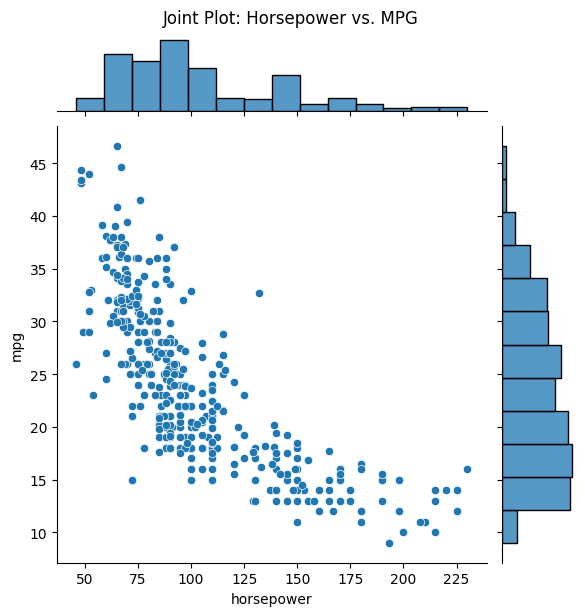

In [19]:
sns.jointplot(x='horsepower', y='mpg', data=df, kind='scatter')
plt.suptitle('Joint Plot: Horsepower vs. MPG', y=1.02)
plt.show()

### LINEAR REGRESSION MODEL 1

In [20]:
X = df['mpg']
y = df['weight']
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          6.02e-102
Time:                        18:11:07   Log-Likelihood:                -2968.4
No. Observations:                 392   AIC:                             5941.
Df Residuals:                     390   BIC:                             5949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5101.1136     75.487     67.576      0.0

The regression shows that as fuel efficiency (mpg) increases, car weight tends to decrease significantly. The model is statistically sound (R-squared = 0.693), but further checks are needed for potential issues with assumptions.

### LINEAR REGRESSION MODEL 2

In [21]:
X = df[['weight','cylinders']]
y = df['mpg']
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     448.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.03e-101
Time:                        18:11:07   Log-Likelihood:                -1126.9
No. Observations:                 392   AIC:                             2260.
Df Residuals:                     389   BIC:                             2272.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2923      0.794     58.305      0.0

The regression reveals that both car weight and the number of cylinders are inversely related to fuel efficiency (mpg). The model is statistically significant (R-squared = 0.697), suggesting a reliable fit, but caution is needed due to potential issues with multicollinearity, as indicated by a large condition number.

### LINEAR REGRESSION MODEL 3

In [22]:
X = df[['weight','cylinders','horsepower']]
y = df['mpg']
X = sm.add_constant(X)
lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     313.1
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          3.22e-103
Time:                        18:11:07   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     388   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7368      0.796     57.461      0.0

The regression shows that car weight and horsepower are inversely related to fuel efficiency (mpg), while the number of cylinders doesn't have a statistically significant impact. The model is generally strong (R-squared = 0.708), but caution is needed due to potential issues with multicollinearity, suggested by a large condition number.

### TESTING WITH ASSUMPTION

In [23]:
import pandas as pd
import scipy.stats as stats

# Load your dataset
df1 = pd.read_csv('mpg.csv')

# Assuming '1' represents cars manufactured in the USA and '2' represents cars manufactured in Europe
group_usa = df1[df1['origin'] == 1]['mpg']
group_europe = df1[df1['origin'] == 2]['mpg']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(group_usa, group_europe, equal_var=False)

print(f'T-statistic :{t_stat:.4f}')
print(f'P-value :{p_value:.4f}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-statistic :-8.6726
P-value :0.0000
Reject the null hypothesis. There is a significant difference.


The code performs a two-sample t-test on fuel efficiency (mpg) between cars manufactured in the USA and Europe. The T-statistic is -8.6726 with a very low p-value of 0.0000, indicating a significant difference in mpg between the two groups. Therefore, the null hypothesis is rejected, suggesting a substantial variation in fuel efficiency based on the origin of manufacture.